In [1]:
import sys
import datetime
import pandas as pd

sys.path.append('../../')
from src.util.functions import Functions
from src.visualize.visualizer import BarPlot
# Disable warning
pd.options.mode.chained_assignment = None 

level = 'regioni'
region_name = "abruzzo"

path_data = '../../data'
path_img_root =  '{path_data}/imgs/grafici/{level}/{region}'.format(path_data=path_data, level=level, region=region_name)
path_csv = '{path_data}/csv'.format(path_data=path_data)
csv_in_name = '{path_csv}/{level}/covid19-{region_name}.csv'.format(path_csv=path_csv, level=level, region_name=region_name)

In [2]:
df_raw = pd.read_csv(csv_in_name)
df_raw

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-02-25T18:00:00,13,Abruzzo,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.000
1,2020-02-26T18:00:00,13,Abruzzo,0,0,0,0,0,0,0,...,0.0,8.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.000
2,2020-02-27T18:00:00,13,Abruzzo,1,0,1,0,1,1,1,...,0.0,20.0,0.0,0.0,0.00,100.00,5.00,0.00,0.00,0.000
3,2020-02-28T18:00:00,13,Abruzzo,1,0,1,0,1,0,0,...,0.0,0.0,0.0,0.0,0.00,100.00,0.00,0.00,0.00,0.000
4,2020-02-29T17:00:00,13,Abruzzo,2,0,2,0,2,1,1,...,0.0,10.0,0.0,0.0,0.00,100.00,10.00,0.00,0.00,100.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,2020-11-15T17:00:00,13,Abruzzo,565,59,624,12410,13034,412,470,...,8.0,3697.0,1665.0,392.0,9.46,4.79,12.71,28.23,0.00,3.724
265,2020-11-16T17:00:00,13,Abruzzo,571,59,630,12869,13499,465,642,...,11.0,3576.0,1930.0,459.0,9.37,4.67,17.95,33.26,0.00,4.926
266,2020-11-17T17:00:00,13,Abruzzo,590,66,656,13352,14008,509,729,...,13.0,4953.0,2326.0,483.0,10.06,4.68,14.72,31.34,11.86,5.400
267,2020-11-18T17:00:00,13,Abruzzo,621,65,686,13704,14390,382,641,...,9.0,4600.0,2081.0,352.0,9.48,4.77,13.93,30.80,-1.52,4.576


In [3]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2020, 11, 19, 17, 0)

In [4]:
# Print stats
# df_n[-2:].iloc[:, 1:]
df_last = df_raw[-1:]
print('Nuovi positivi:', df_last['nuovi_positivi'].item())
print('Nuovi tamponi:', df_last['nuovi_tamponi'].item())
print('Percentuale nuovi positivi/nuovi tamponi:', round(df_last['nuovi_positivi'].item()/df_last['nuovi_tamponi'].item(), 2) * 100, '%')
print('Nuovi guariti:', df_last['nuovi_dimessi_guariti'].item())
print('Nuovi deceduti:', df_last['nuovi_deceduti'].item())
print('Variazione positivi ricoverati con sintomi:', df_last['variazione_ricoverati_con_sintomi'].item())
print('Variazione positivi in terapia intensiva:', df_last['variazione_terapia_intensiva'].item())
print('Variazione positivi in isolamento dimiciliare:', df_last['variazione_isolamento_domiciliare'].item())

Nuovi positivi: 649
Nuovi tamponi: 4813.0
Percentuale nuovi positivi/nuovi tamponi: 13.0 %
Nuovi guariti: 168.0
Nuovi deceduti: 9.0
Variazione positivi ricoverati con sintomi: 37.0
Variazione positivi in terapia intensiva: 9.0
Variazione positivi in isolamento dimiciliare: 426.0


In [5]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2020, 11, 19, 17, 0)

In [6]:
# TODO: define function
days = 60
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-09-20T17:00:00,13,Abruzzo,48,5,53,626,679,0,0,...,0.0,0.0,0.0,0.0,9.43,7.81,0.00,0.00,0.00,0.000
1,2020-09-21T17:00:00,13,Abruzzo,58,5,63,676,739,60,72,...,1.0,3976.0,2438.0,50.0,7.94,8.53,1.81,2.95,0.00,10.604
2,2020-09-22T17:00:00,13,Abruzzo,54,5,59,683,742,3,18,...,0.0,1122.0,695.0,7.0,8.47,7.95,1.60,2.59,0.00,2.436
3,2020-09-23T17:00:00,13,Abruzzo,55,4,59,701,760,18,22,...,2.0,1848.0,1198.0,18.0,6.78,7.76,1.19,1.84,-20.00,2.965
4,2020-09-24T17:00:00,13,Abruzzo,50,4,54,716,770,10,17,...,0.0,1875.0,1077.0,15.0,7.41,7.01,0.91,1.58,0.00,2.237
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2020-11-15T17:00:00,13,Abruzzo,565,59,624,12410,13034,412,470,...,8.0,3697.0,1665.0,392.0,9.46,4.79,12.71,28.23,0.00,3.724
57,2020-11-16T17:00:00,13,Abruzzo,571,59,630,12869,13499,465,642,...,11.0,3576.0,1930.0,459.0,9.37,4.67,17.95,33.26,0.00,4.926
58,2020-11-17T17:00:00,13,Abruzzo,590,66,656,13352,14008,509,729,...,13.0,4953.0,2326.0,483.0,10.06,4.68,14.72,31.34,11.86,5.400
59,2020-11-18T17:00:00,13,Abruzzo,621,65,686,13704,14390,382,641,...,9.0,4600.0,2081.0,352.0,9.48,4.77,13.93,30.80,-1.52,4.576


In [7]:
# Define figures properties
graph_prop = {'path_root': path_img,
              'label_font': 14,
              'data': {'label': 'Data', 'ticks': lambda x: x.split('T')[0]},
              'nuovi_positivi': {'label': 'Nuovi positivi', 'file_name': 'nuovi_positivi'},
              'np_su_nt': {'label': 'Nuovi positivi / Nuovi tamponi (%)', 'file_name': 'nuovi_positivi_su_nuovi_tamponi'},
              'np_su_nct': {'label': 'Nuovi positivi / Nuovi casi testati (%)', 'file_name': 'nuovi_positivi_su_nuovi_casi_testati'},
              'totale_positivi': {'label': 'Totale positivi', 'file_name': 'totale_positivi'},
              'var_pos_perc': {'label': 'Variazione totale positivi (%)', 'file_name': 'variazione_totale_positivi_perc'},
              'terapia_intensiva': {'label': 'Terapia intensiva', 'file_name': 'terapia_intensiva'},
              'var_ti_perc': {'label': 'Variazione terapia intensiva (%)', 'file_name': 'variazione_terapia_intensiva_perc'},
              'ti_su_to': {'label': 'Terapia intensiva / Totale ospedalizzati (%)', 'file_name': 'terapia_intensiva_su_totale_ospedalizzati'},
              'saturazione_terapia_intensiva': {'label': 'Saturazione terapia intensiva (%)', 'file_name': 'saturazione_terapia_intensiva'},
              'totale_ospedalizzati': {'label': 'Totale ospedalizzati', 'file_name': 'totale_ospedalizzati'},
              'to_su_tp': {'label': 'Totale ospedalizzati / Totale positivi (%)', 'file_name': 'totale_ospedalizzati_su_totale_positivi'},
              'nuovi_deceduti': {'label': 'Nuovi deceduti', 'file_name': 'nuovi_deceduti'},
              'nuovi_dimessi_guariti': {'label': 'Nuovi dimessi guariti', 'file_name': 'nuovi_dimessi_guariti'}}

# Create BarPlot object
bp = BarPlot(df, 'data', graph_prop)

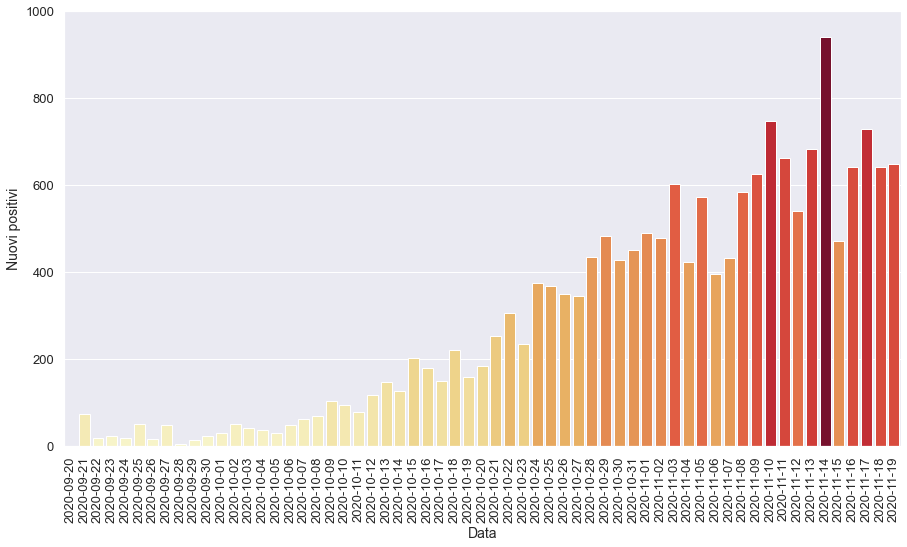

In [8]:
# New positives on new swabs in the last 60 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

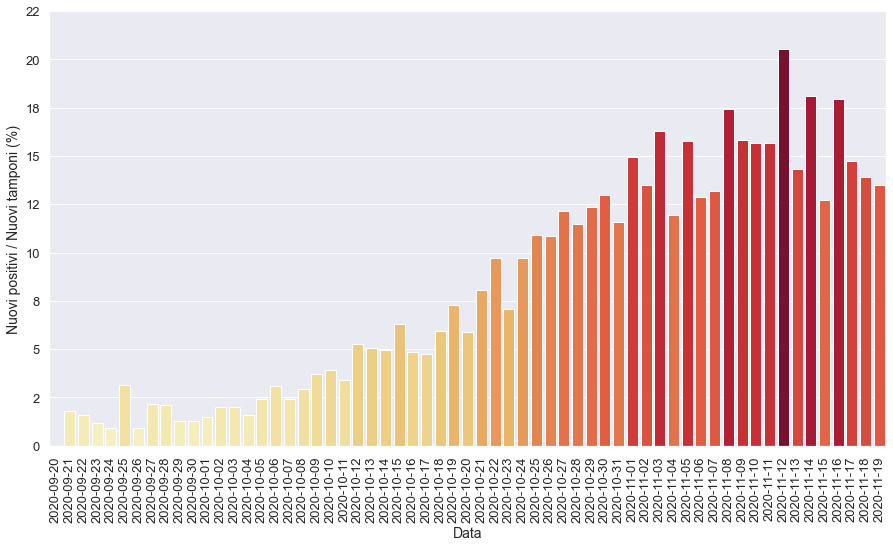

In [9]:
# New positives on new swabs in the last 60 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

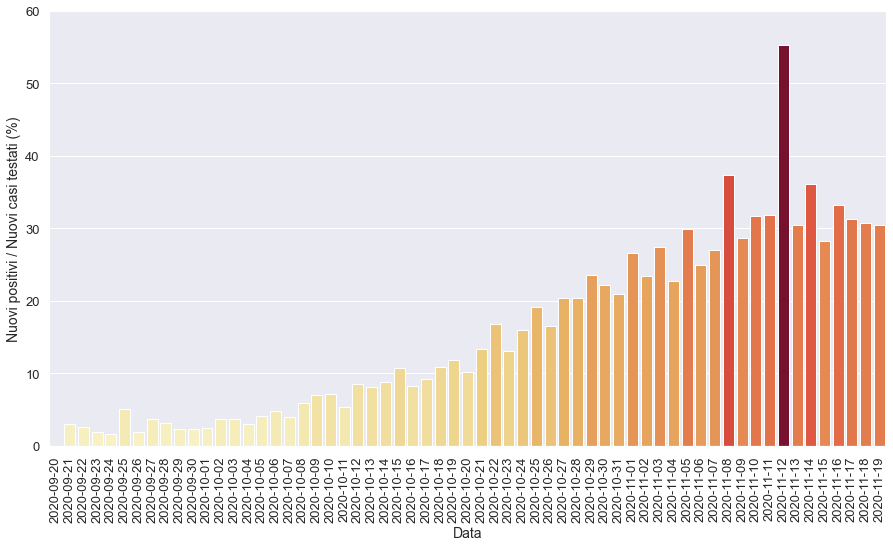

In [10]:
# New positives on new tested cases in the last 60 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

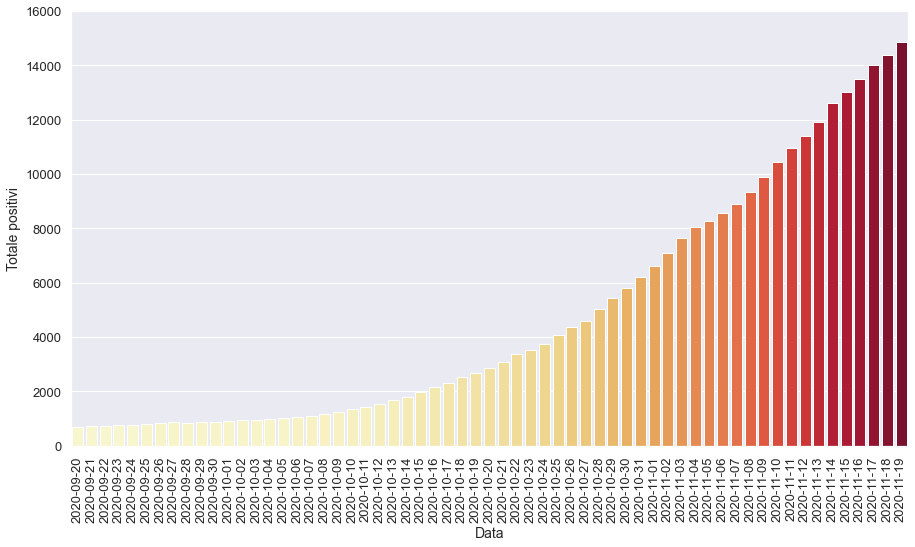

In [11]:
# Percentage of variation of positives in the last 60 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

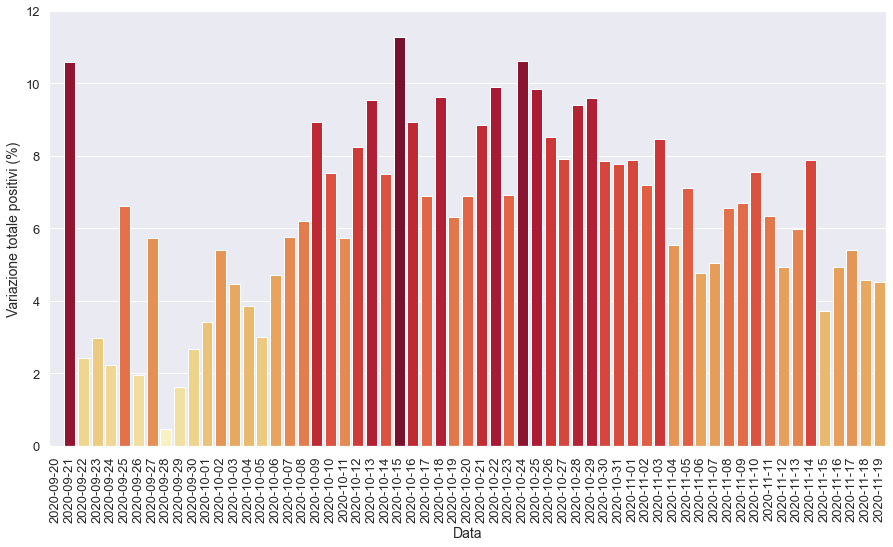

In [12]:
# Percentage of variation of total positives in the last 60 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

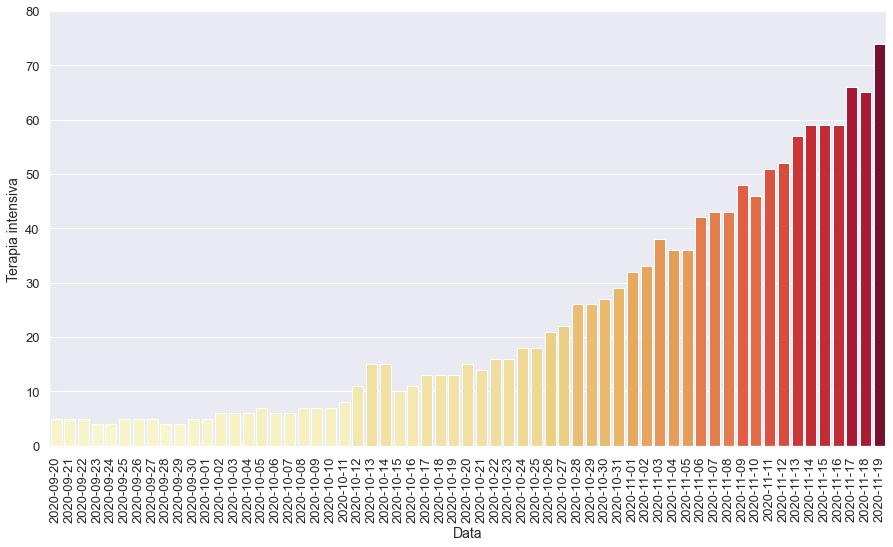

In [13]:
# Positives in ICU in the last 60 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

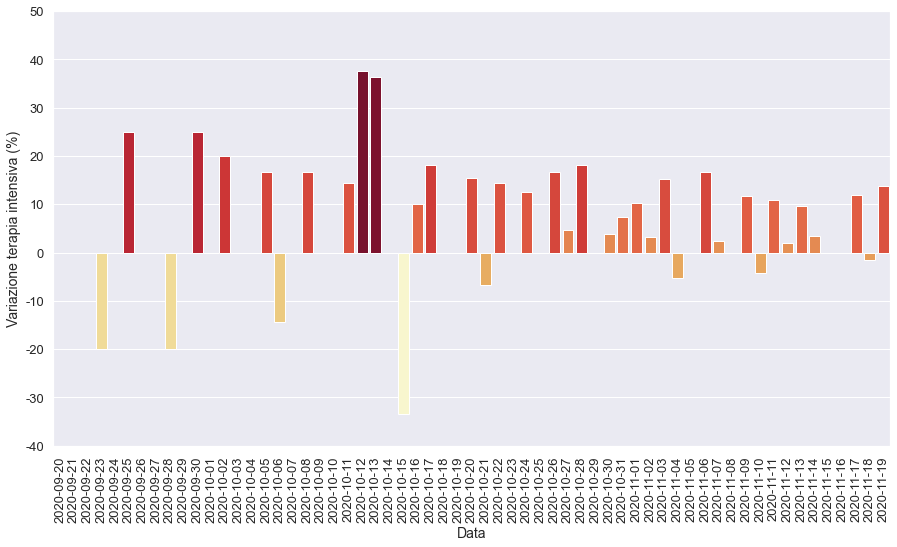

In [14]:
# Percentage of variation of positives in ICU in the last 60 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

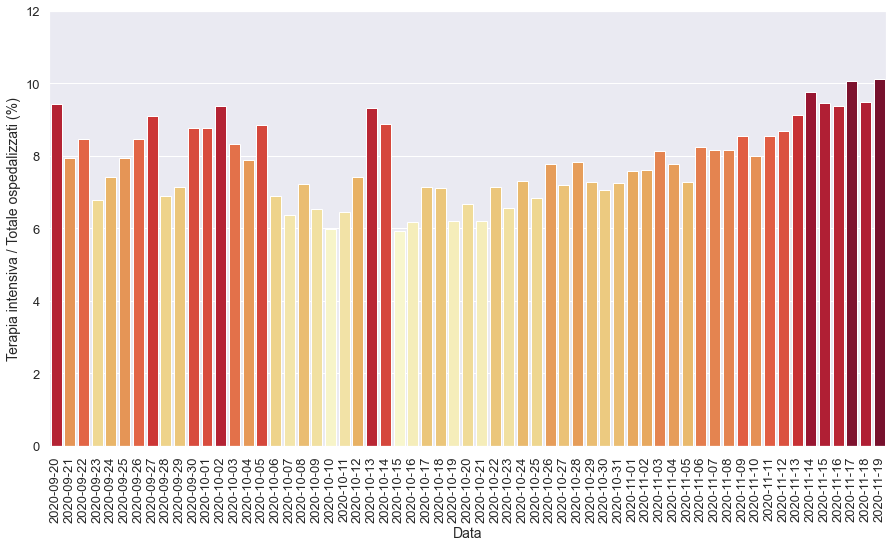

In [15]:
# Positives in ICU in the last 60 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

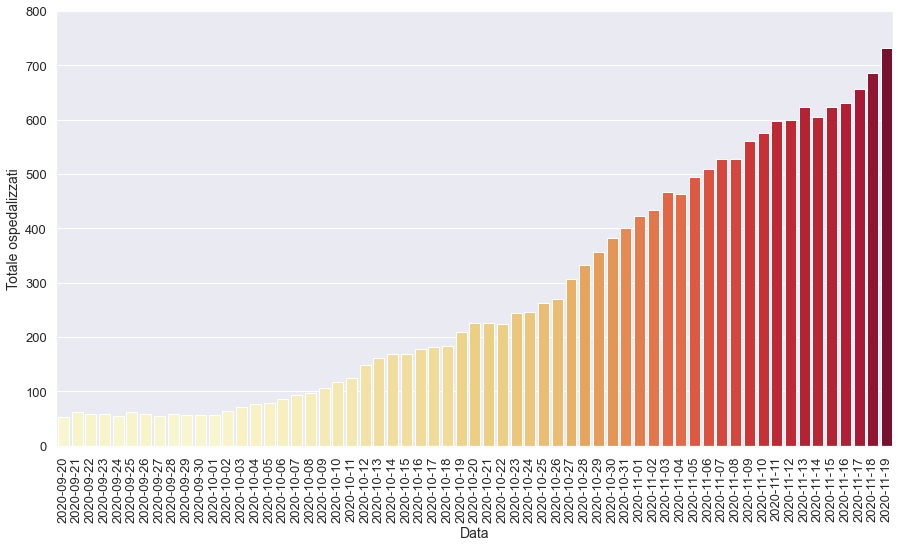

In [16]:
# Hospitalized positives in the last 60 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

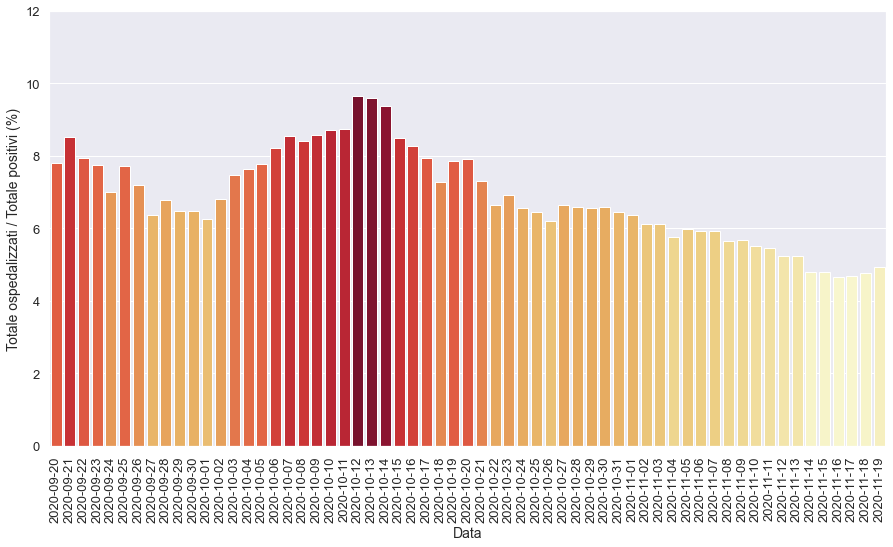

In [17]:
# Hospitalized positives in the last 60 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

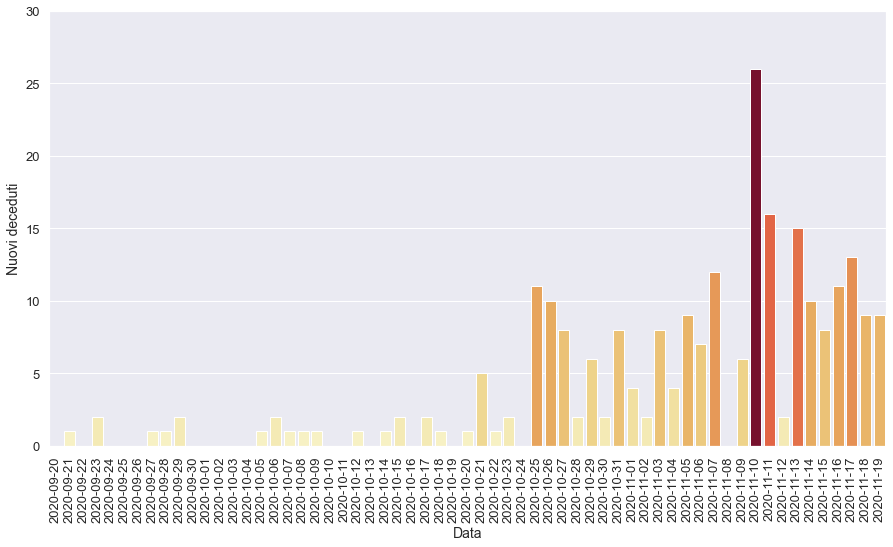

In [18]:
# New deads in the last 60 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

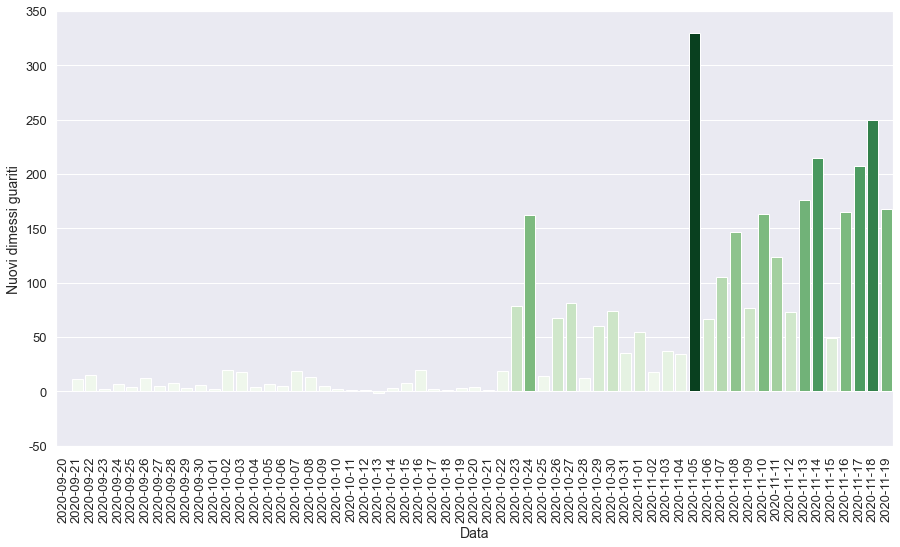

In [19]:
# New healed in the last 60 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [20]:
# TODO: define function
days = 30
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-10-20T17:00:00,13,Abruzzo,210,15,225,2620,2845,176,184,...,1.0,3115.0,1798.0,161.0,6.67,7.91,5.91,10.23,15.38,6.902
1,2020-10-21T17:00:00,13,Abruzzo,212,14,226,2865,3091,246,252,...,5.0,3123.0,1883.0,245.0,6.19,7.31,8.07,13.38,-6.67,8.858
2,2020-10-22T17:00:00,13,Abruzzo,208,16,224,3152,3376,285,306,...,1.0,3149.0,1815.0,287.0,7.14,6.64,9.72,16.86,14.29,9.903
3,2020-10-23T17:00:00,13,Abruzzo,228,16,244,3285,3529,153,234,...,2.0,3299.0,1782.0,133.0,6.56,6.91,7.09,13.13,0.00,6.931
4,2020-10-24T17:00:00,13,Abruzzo,228,18,246,3496,3742,213,375,...,0.0,3862.0,2339.0,211.0,7.32,6.57,9.71,16.03,12.50,10.626
5,2020-10-25T17:00:00,13,Abruzzo,245,18,263,3822,4085,343,368,...,11.0,3368.0,1920.0,326.0,6.84,6.44,10.93,19.17,0.00,9.834
6,2020-10-26T17:00:00,13,Abruzzo,249,21,270,4083,4353,268,348,...,10.0,3204.0,2112.0,261.0,7.78,6.20,10.86,16.48,16.67,8.523
7,2020-10-27T17:00:00,13,Abruzzo,284,22,306,4303,4609,256,345,...,8.0,2844.0,1688.0,220.0,7.19,6.64,12.13,20.44,4.76,7.926
8,2020-10-28T17:00:00,13,Abruzzo,306,26,332,4697,5029,420,434,...,2.0,3780.0,2129.0,394.0,7.83,6.60,11.48,20.39,18.18,9.416
9,2020-10-29T17:00:00,13,Abruzzo,331,26,357,5087,5444,415,482,...,6.0,3910.0,2048.0,390.0,7.28,6.56,12.33,23.54,0.00,9.586


In [21]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

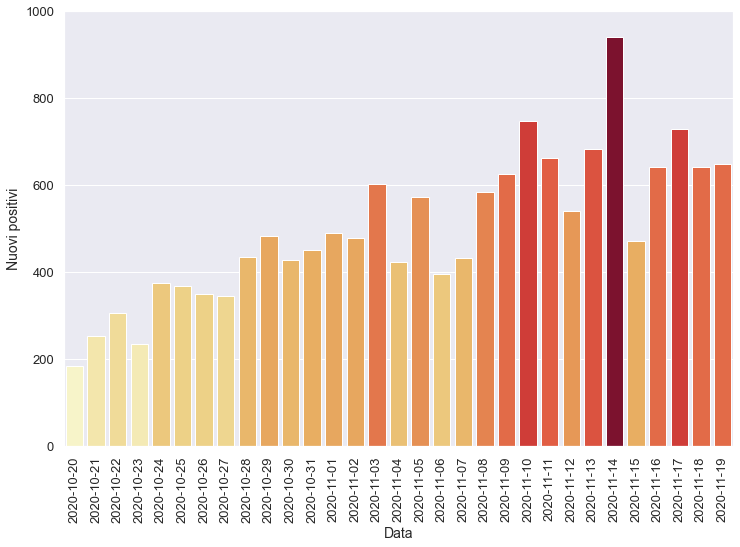

In [22]:
# New positives on new swabs in the last 30 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

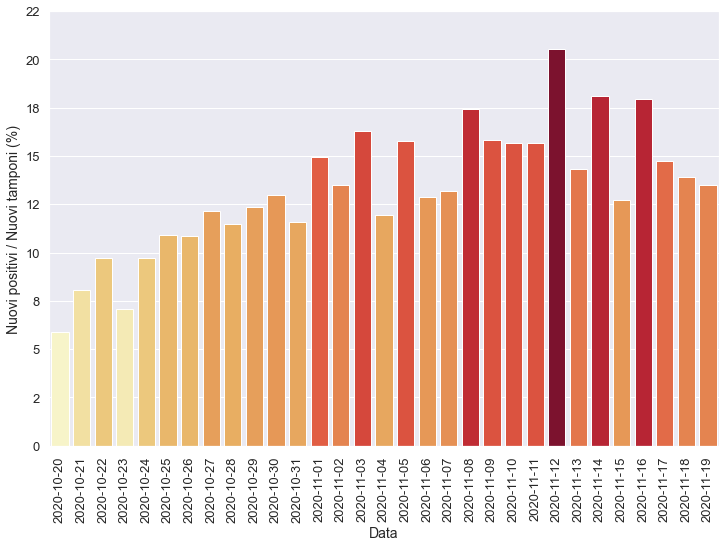

In [23]:
# New positives on new swabs in the last 30 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

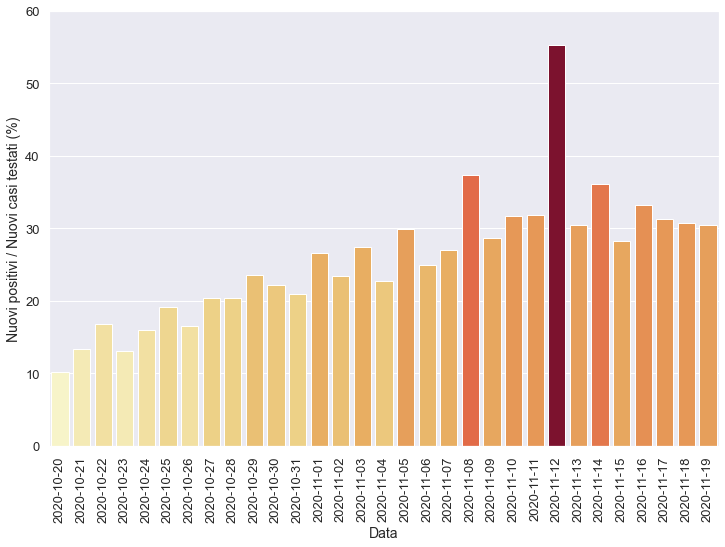

In [24]:
# New positives on new tested cases in the last 30 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

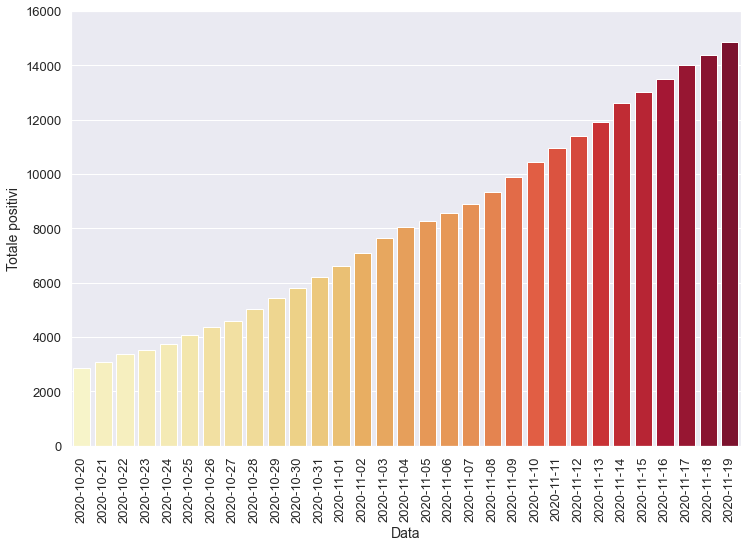

In [25]:
# Number of positives in the last 30 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

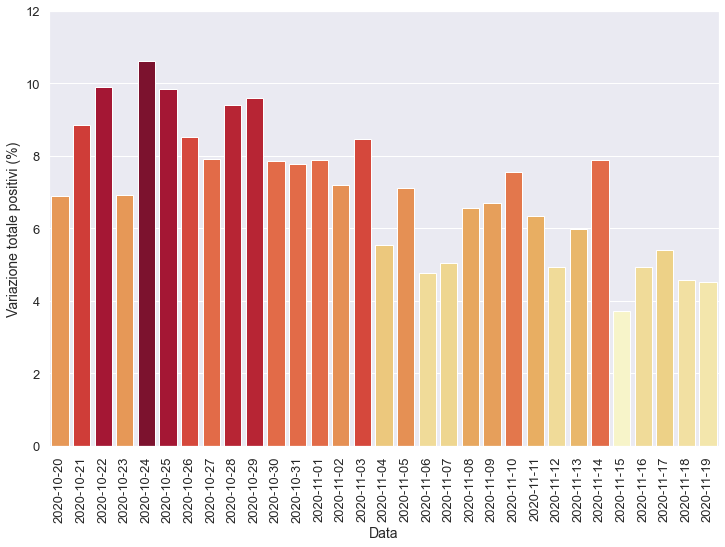

In [26]:
# Percentage of variation of positives in the last 30 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

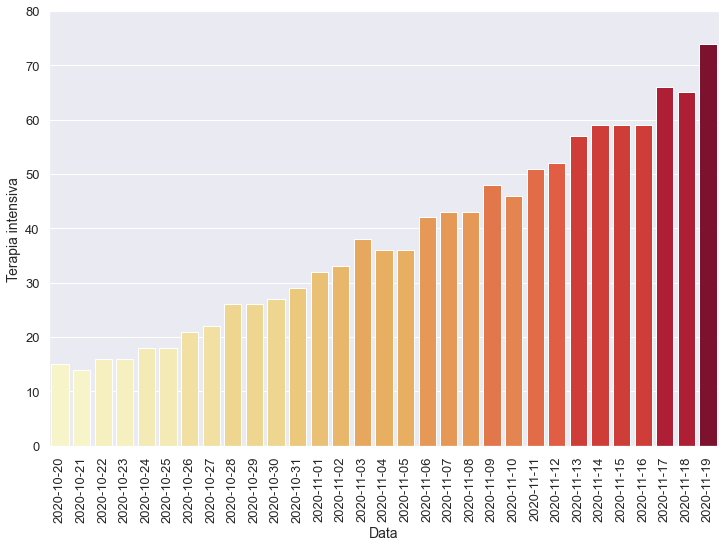

In [27]:
# Positives in ICU in the last 30 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

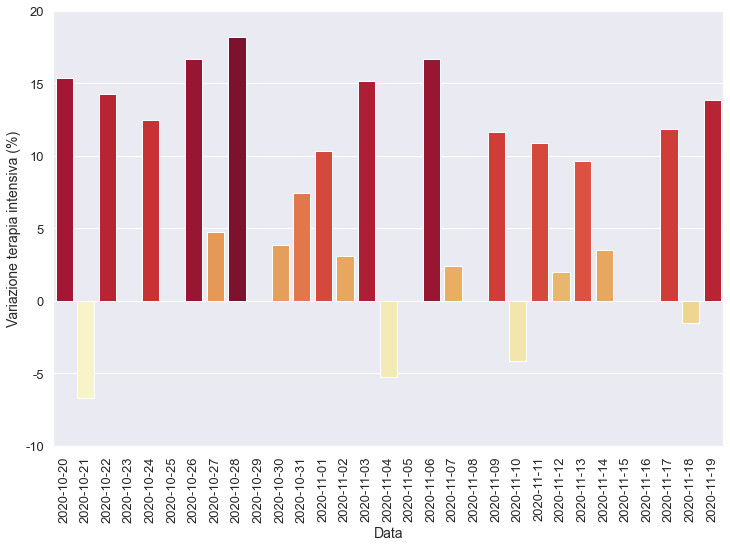

In [28]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

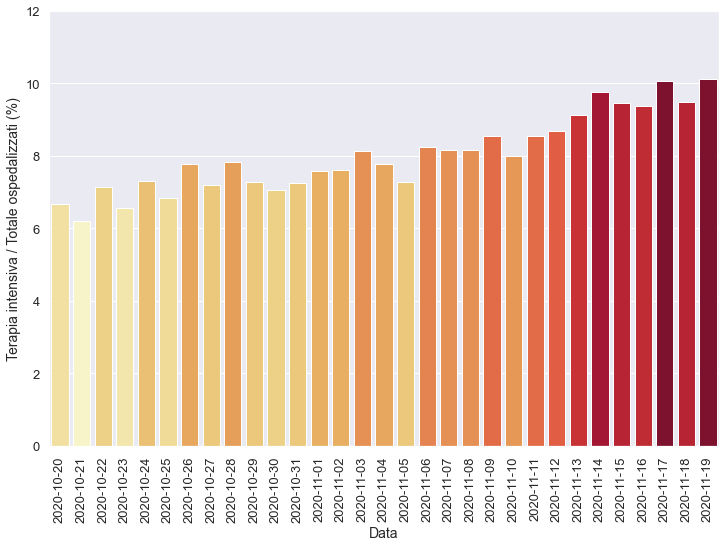

In [29]:
# TODO
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

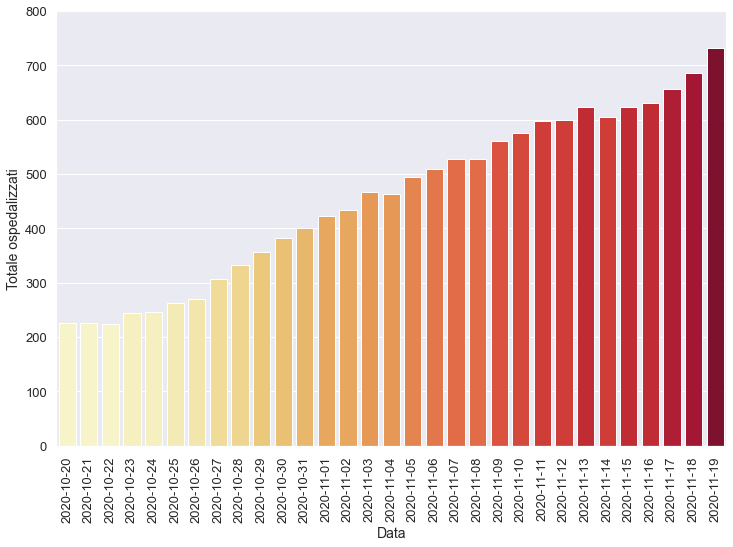

In [30]:
# Hospitalized positives in the last 30 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

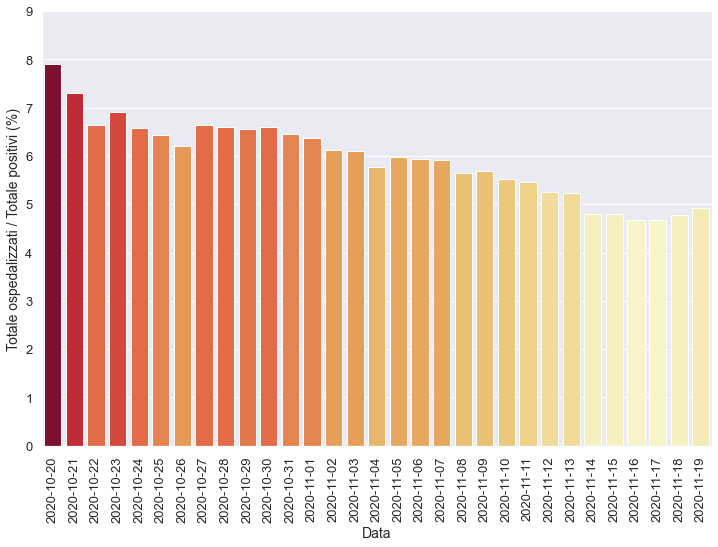

In [31]:
# Hospitalized positives in the last 30 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

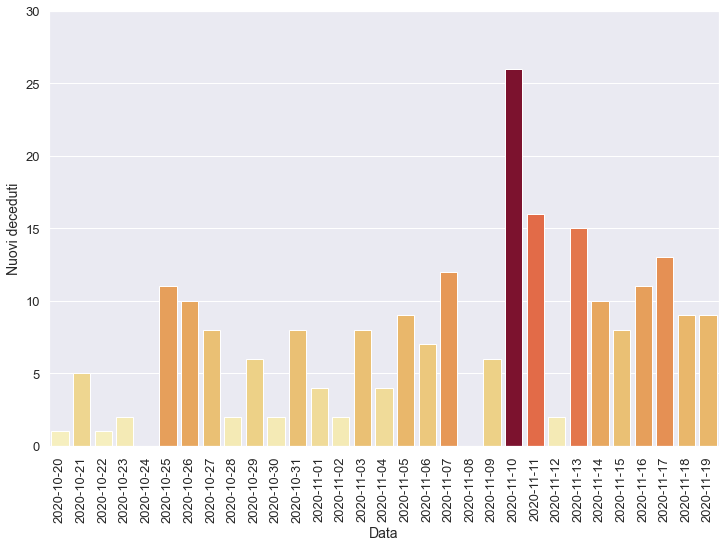

In [32]:
# New deads in the last 30 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

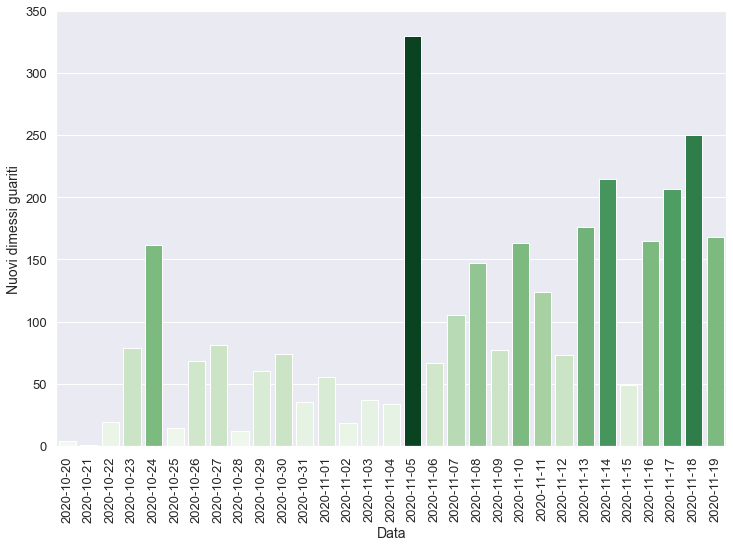

In [33]:
# New healed in the last 30 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [34]:
# TODO: define function
days = 7
path_img = '{path_img_root}/0{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-11-12T17:00:00,13,Abruzzo,547,52,599,10817,11416,466,541,...,2.0,2636.0,979.0,464.0,8.68,5.25,20.52,55.26,1.96,4.941
1,2020-11-13T17:00:00,13,Abruzzo,567,57,624,11284,11908,492,683,...,15.0,4769.0,2244.0,467.0,9.13,5.24,14.32,30.44,9.62,5.983
2,2020-11-14T17:00:00,13,Abruzzo,545,59,604,12018,12622,714,939,...,10.0,5183.0,2604.0,734.0,9.77,4.79,18.12,36.06,3.51,7.885
3,2020-11-15T17:00:00,13,Abruzzo,565,59,624,12410,13034,412,470,...,8.0,3697.0,1665.0,392.0,9.46,4.79,12.71,28.23,0.00,3.724
4,2020-11-16T17:00:00,13,Abruzzo,571,59,630,12869,13499,465,642,...,11.0,3576.0,1930.0,459.0,9.37,4.67,17.95,33.26,0.00,4.926
5,2020-11-17T17:00:00,13,Abruzzo,590,66,656,13352,14008,509,729,...,13.0,4953.0,2326.0,483.0,10.06,4.68,14.72,31.34,11.86,5.400
6,2020-11-18T17:00:00,13,Abruzzo,621,65,686,13704,14390,382,641,...,9.0,4600.0,2081.0,352.0,9.48,4.77,13.93,30.80,-1.52,4.576
7,2020-11-19T17:00:00,13,Abruzzo,658,74,732,14130,14862,472,649,...,9.0,4813.0,2130.0,426.0,10.11,4.93,13.48,30.47,13.85,4.510


In [35]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

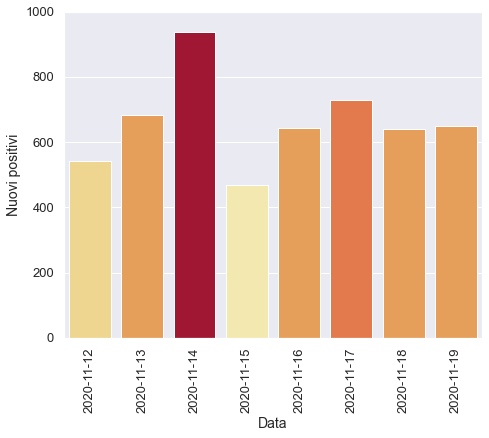

In [36]:
# New positives on new swabs in the last 7 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

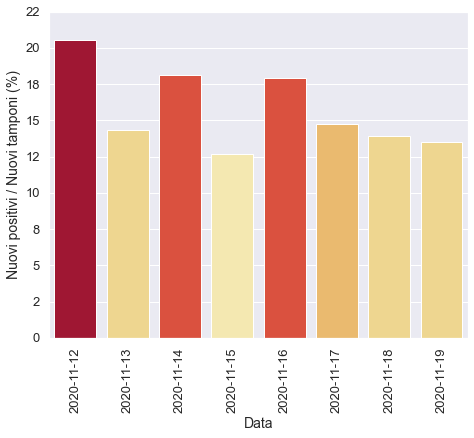

In [37]:
# New positives on new swabs in the last 7 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

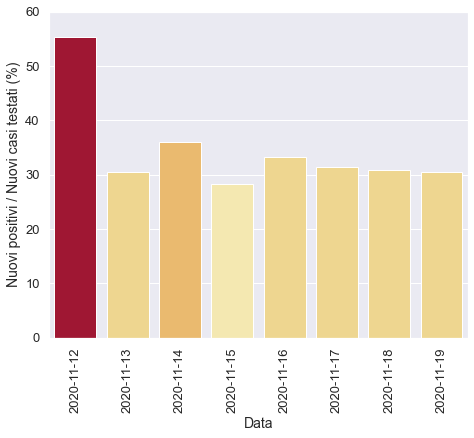

In [38]:
# New positives on new tested cases in the last 7 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

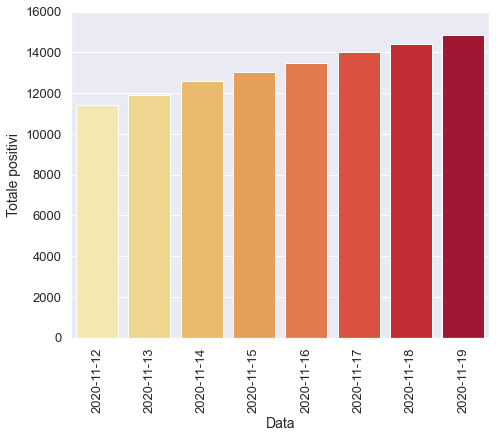

In [39]:
# Percentage of variation of positives in the last 7 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

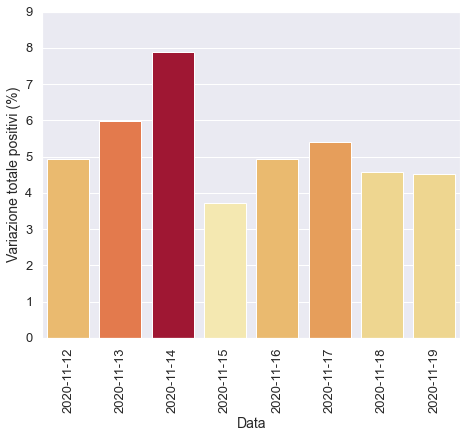

In [40]:
# Percentage of variation of positives in the last 7 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

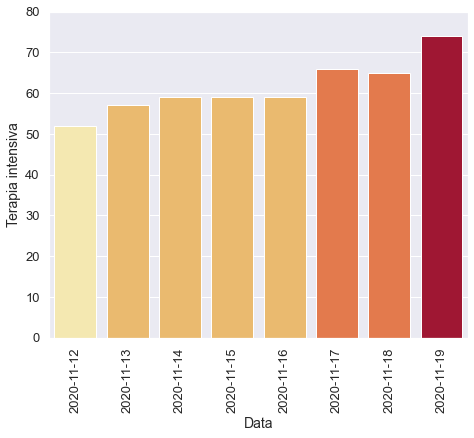

In [41]:
# Positives in ICU in the last 7 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

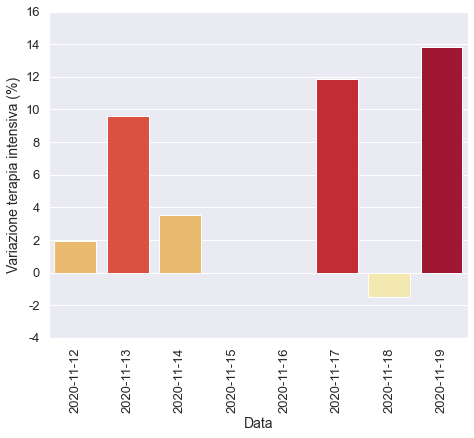

In [42]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

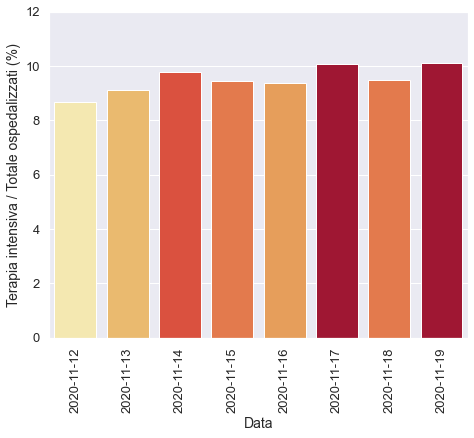

In [43]:
# Positives in ICU in the last 7 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

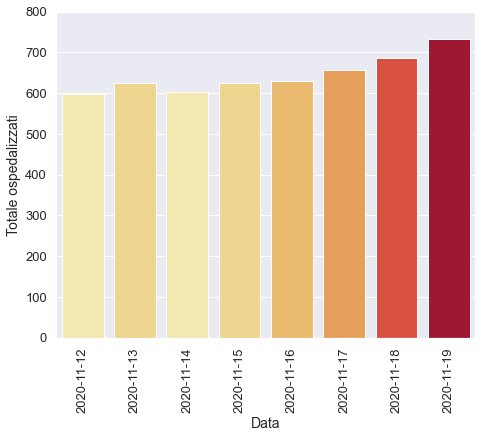

In [44]:
# Hospitalized positives in the last 7 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

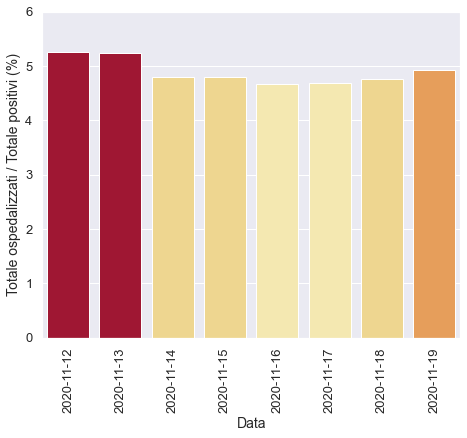

In [45]:
# Hospitalized positives in the last 7 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

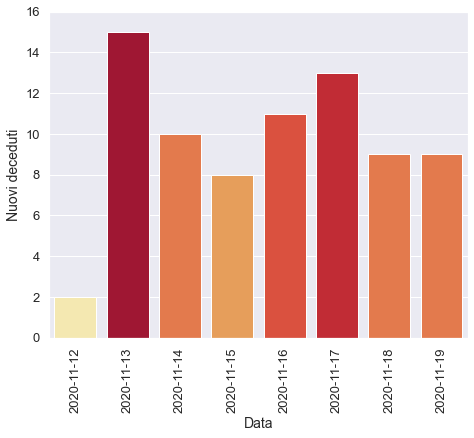

In [46]:
# New deads in the last 7 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

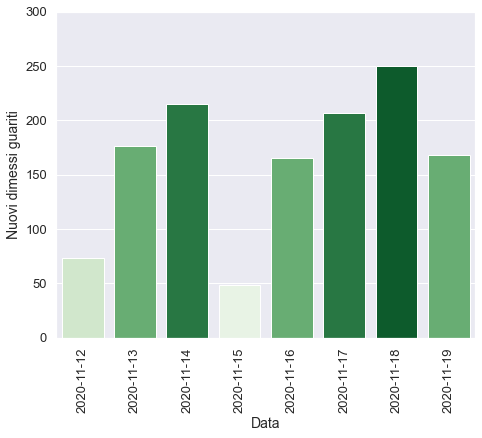

In [47]:
# New healed in the last 7 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)